In [4]:
import numpy as np
import astropy.table as table
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
lc = pd.read_hdf('../products/lc_interpolated_per_ins.h5')
lc

mag_"g"_ZTF  magerr_"g"_ZTF  mag_"i"_ZTF  magerr_"i"_ZTF  \
mjd                                                                    
58716.3888    18.972152        0.045186    19.230959        0.149647   
58717.3888    18.723950        0.036411    19.072053        0.117624   
58718.3888    18.482736        0.029957    18.891938        0.092034   
58719.3888    18.250384        0.025511    18.694685        0.072902   
58720.3888    18.028632        0.022634    18.484911        0.059742   
...                 ...             ...          ...             ...   
58871.3888    19.718567        0.159474          NaN             NaN   
58872.3888    19.729843        0.171648          NaN             NaN   
58873.3888          NaN             NaN          NaN             NaN   
58874.3888          NaN             NaN          NaN             NaN   
58875.3888          NaN             NaN          NaN             NaN   

            mag_"r"_ZTF  magerr_"r"_ZTF  mag_"g"_SEDM  magerr_"g"_SEDM  \
mjd                                                                      
58716.3888    18.833020        0.033760     18.069113         0.269980   
58717.3888    18.664586        0.024281     17.971336         0.235254   
58718.3888    18.477867        0.019041     17.870803         0.201954   
58719.3888    18.277773        0.017168     17.768423         0.170351   
58720.3888    18.069597        0.017043     17.665177         0.140704   
...                 ...             ...           ...              ...   
58871.3888    19.221826        0.127575           NaN              NaN   
58872.3888    19.231203        0.120985           NaN              NaN   
58873.3888    19.233642        0.113643           NaN              NaN   
58874.3888    19.228725        0.108614           NaN              NaN   
58875.3888    19.216243        0.110168           NaN              NaN   

            mag_"i"_SEDM  magerr_"i"_SEDM  mag_"r"_SEDM  magerr_"r"_SEDM  \
mjd                                                                        
58716.3888     18.568135         0.216188     18.630171         0.000006   
58717.3888     18.414624         0.184655     18.630171         0.000006   
58718.3888     18.259265         0.155399     18.630171         0.000006   
58719.3888     18.103288         0.128519           NaN              NaN   
58720.3888     17.947923         0.104088           NaN              NaN   
...                  ...              ...           ...              ...   
58871.3888           NaN              NaN           NaN              NaN   
58872.3888           NaN              NaN           NaN              NaN   
58873.3888           NaN              NaN           NaN              NaN   
58874.3888           NaN              NaN           NaN              NaN   
58875.3888           NaN              NaN           NaN              NaN   

            mag_"u"_SEDM  magerr_"u"_SEDM  
mjd                                        
58716.3888     17.934097         0.000081  
58717.3888     17.934097         0.000081  
58718.3888     17.934097         0.000081  
58719.3888     17.934097         0.000081  
58720.3888     17.934097         0.000081  
...                  ...              ...  
58871.3888           NaN              NaN  
58872.3888           NaN              NaN  
58873.3888           NaN              NaN  
58874.3888           NaN              NaN  
58875.3888           NaN              NaN  

[160 rows x 14 columns]

In [11]:
band = 'g'
yerr = lc['magerr_"%s"_ZTF' % band] + lc['magerr_"%s"_SEDM' % band]
idx = yerr < 0.4
plt.errorbar(lc.index[idx], (lc['mag_"%s"_ZTF' % band] - lc['mag_"%s"_SEDM' % band])[idx], yerr=yerr[idx], fmt='o')

<ErrorbarContainer object of 3 artists>

In [12]:
band = 'r'
yerr = lc['magerr_"%s"_ZTF' % band] + lc['magerr_"%s"_SEDM' % band]
idx = yerr < 0.4
plt.errorbar(lc.index[idx], (lc['mag_"%s"_ZTF' % band] - lc['mag_"%s"_SEDM' % band])[idx], yerr=yerr[idx], fmt='o')

<ErrorbarContainer object of 3 artists>

<ErrorbarContainer object of 3 artists>

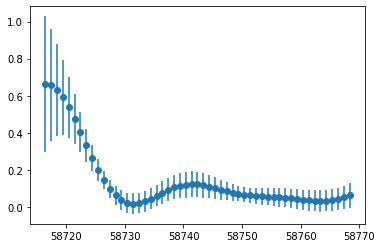

In [13]:
band = 'i'
yerr = lc['magerr_"%s"_ZTF' % band] + lc['magerr_"%s"_SEDM' % band]
idx = yerr < 0.4
plt.errorbar(lc.index[idx], (lc['mag_"%s"_ZTF' % band] - lc['mag_"%s"_SEDM' % band])[idx], yerr=yerr[idx], fmt='o')

In [14]:
# hmm... but is it due to the interpolation..?

In [26]:
# load the P60 LC only
m_lc = table.Table.read('../data/marshal_raw_lc.csv')
m_lc['MJD'] = m_lc['jdobs'] - 2400000.5
#print(np.unique(m_lc['instrument']))
idx = m_lc['instrument'] == '"P60+SEDM"'
p60_lc = m_lc[idx]
p60_lc

<Table length=39>
    date       jdobs     filter ...  limmag instrument        MJD        
   str11      float64     str3  ... float64   str15         float64      
----------- ------------ ------ ... ------- ---------- ------------------
"2019Aug22" 2458717.6608    "r" ...    99.0 "P60+SEDM"  58717.16080000019
"2019Aug23" 2458718.9546    "r" ...    99.0 "P60+SEDM"  58718.45459999982
"2019Aug31" 2458726.6646    "g" ...    99.0 "P60+SEDM" 58726.164599999785
"2019Aug31" 2458726.6662    "i" ...    99.0 "P60+SEDM"  58726.16619999986
"2019Sep01" 2458727.7288    "g" ...    99.0 "P60+SEDM"  58727.22880000016
"2019Sep01" 2458727.7305    "i" ...    99.0 "P60+SEDM"  58727.23050000006
"2019Sep01" 2458727.7321    "u" ...    99.0 "P60+SEDM"  58727.23210000014
"2019Sep10" 2458736.8285    "g" ...    99.0 "P60+SEDM"  58736.32849999983
"2019Sep10" 2458736.8301    "i" ...    99.0 "P60+SEDM" 58736.330099999905
"2019Sep10" 2458736.8317    "u" ...    99.0 "P60+SEDM"  58736.33169999998
        ...          ...    ... ...     ...        ...                ...
"2019Oct27" 2458783.6756    "i" ...    16.1 "P60+SEDM"  58783.17560000019
"2019Nov04" 2458791.6141    "g" ...    99.0 "P60+SEDM"  58791.11409999989
"2019Nov04" 2458791.6168    "i" ...    99.0 "P60+SEDM"  58791.11679999996
"2019Nov04" 2458791.6195    "u" ...    19.5 "P60+SEDM"  58791.11950000003
"2019Nov24" 2458811.7878    "g" ...    99.0 "P60+SEDM"  58811.28780000005
"2019Nov24" 2458811.7932    "u" ...    19.0 "P60+SEDM"  58811.29320000019
"2019Dec11" 2458828.6907    "g" ...    18.4 "P60+SEDM"  58828.19070000015
"2020Jan04" 2458852.6693    "g" ...    99.0 "P60+SEDM"  58852.16930000018
"2020Jan23" 2458871.6699    "g" ...    99.0 "P60+SEDM" 58871.169900000095
"2020Jan23" 2458871.6753    "u" ...    99.0 "P60+SEDM"  58871.17529999977

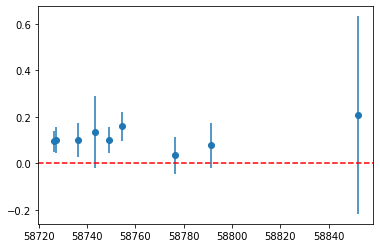

In [30]:
band = 'g'
p60_band = '"%s"' % band

p60_idx = p60_lc['filter'] == p60_band
p60_mjd = p60_lc['MJD'][p60_idx]
p60_mags = p60_lc['magpsf'][p60_idx]
p60_magerrs = p60_lc['sigmamagpsf'][p60_idx]

# interpolate the interpolated LC further..
p48_times = lc.index
p48_mags = lc['mag_"%s"_ZTF' % band]
p48_magerrs = lc['magerr_"%s"_ZTF' % band]

p48_interp_mags = np.interp(p60_mjd, p48_times, p48_mags)
p48_interp_magerrs = np.interp(p60_mjd, p48_times, p48_magerrs)

idx = np.logical_and(p60_magerrs < 0.4, p48_interp_magerrs < 0.4)
yerr = p60_magerrs + p48_interp_magerrs
plt.errorbar(p60_mjd[idx], (p60_mags-p48_interp_mags)[idx], yerr=yerr[idx], fmt='o')
plt.axhline(y=0, color='red', ls='--')

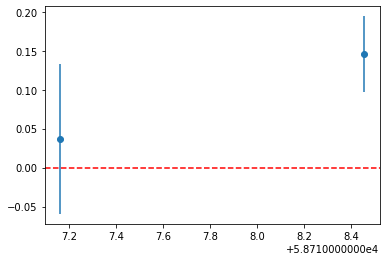

In [33]:
band = 'r'
p60_band = '"%s"' % band

p60_idx = p60_lc['filter'] == p60_band
p60_mjd = p60_lc['MJD'][p60_idx]
p60_mags = p60_lc['magpsf'][p60_idx]
p60_magerrs = p60_lc['sigmamagpsf'][p60_idx]

# interpolate the interpolated LC further..
p48_times = lc.index
p48_mags = lc['mag_"%s"_ZTF' % band]
p48_magerrs = lc['magerr_"%s"_ZTF' % band]

p48_interp_mags = np.interp(p60_mjd, p48_times, p48_mags)
p48_interp_magerrs = np.interp(p60_mjd, p48_times, p48_magerrs)

idx = np.logical_and(p60_magerrs < 0.5, p48_interp_magerrs < 0.5)
yerr = p60_magerrs + p48_interp_magerrs
plt.errorbar(p60_mjd[idx], (p60_mags-p48_interp_mags)[idx], yerr=yerr[idx], fmt='o')
plt.axhline(y=0, color='red', ls='--')

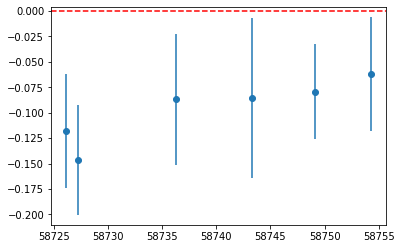

In [32]:
band = 'i'
p60_band = '"%s"' % band

p60_idx = p60_lc['filter'] == p60_band
p60_mjd = p60_lc['MJD'][p60_idx]
p60_mags = p60_lc['magpsf'][p60_idx]
p60_magerrs = p60_lc['sigmamagpsf'][p60_idx]

# interpolate the interpolated LC further..
p48_times = lc.index
p48_mags = lc['mag_"%s"_ZTF' % band]
p48_magerrs = lc['magerr_"%s"_ZTF' % band]

p48_interp_mags = np.interp(p60_mjd, p48_times, p48_mags)
p48_interp_magerrs = np.interp(p60_mjd, p48_times, p48_magerrs)

idx = np.logical_and(p60_magerrs < 0.5, p48_interp_magerrs < 0.5)
yerr = p60_magerrs + p48_interp_magerrs
plt.errorbar(p60_mjd[idx], (p60_mags-p48_interp_mags)[idx], yerr=yerr[idx], fmt='o')
plt.axhline(y=0, color='red', ls='--')

In [34]:
# load GROND LC
grond_lc = table.Table.read('../data/grond_lc_v3.fits')
grond_lc

<Table length=8>
       mjd              mag_g        ...       mag_K              magerr_K     
     float64           float64       ...      float64             float64      
----------------- ------------------ ... ------------------ -------------------
 58764.1901355999 18.898626500001548 ...  15.86750272270072 0.09490106198094707
58772.07589106129 19.565166333334886 ... 16.359052138558138 0.22852565463577224
58774.04200655782 18.961489555556803 ...    15.983726676854 0.11415121704903305
58778.11519076466   18.8214155045909 ... 16.366626012010908 0.13358076498051322
58783.09287482079 19.011296671202977 ... 16.402312475552826  0.1373648790066015
58789.05341837661  18.95522853103948 ... 16.214498144257636  0.2292517711743819
58794.05187395877  19.02260613698111 ... 16.276035070953732  0.2034494191010531
58814.05056632643  19.27459314445816 ...  17.04737155810921  0.1810791601087106

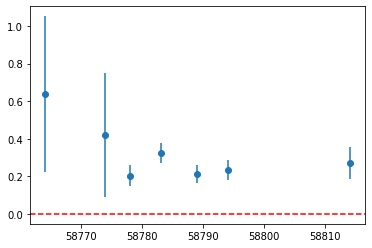

In [35]:
band = 'g'
grond_mjd = grond_lc['mjd']
grond_mags = grond_lc['mag_%s' % band]
grond_magerrs = grond_lc['magerr_%s' % band]

# interpolate the interpolated LC further..
p48_times = lc.index
p48_mags = lc['mag_"%s"_ZTF' % band]
p48_magerrs = lc['magerr_"%s"_ZTF' % band]

p48_interp_mags = np.interp(grond_mjd, p48_times, p48_mags)
p48_interp_magerrs = np.interp(grond_mjd, p48_times, p48_magerrs)

idx = np.logical_and(grond_magerrs < 0.5, p48_interp_magerrs < 0.5)
yerr = grond_magerrs + p48_interp_magerrs
plt.errorbar(grond_mjd[idx], (grond_mags-p48_interp_mags)[idx], yerr=yerr[idx], fmt='o')
plt.axhline(y=0, color='red', ls='--')

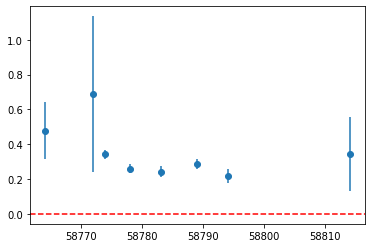

In [36]:
band = 'r'
grond_mjd = grond_lc['mjd']
grond_mags = grond_lc['mag_%s' % band]
grond_magerrs = grond_lc['magerr_%s' % band]

# interpolate the interpolated LC further..
p48_times = lc.index
p48_mags = lc['mag_"%s"_ZTF' % band]
p48_magerrs = lc['magerr_"%s"_ZTF' % band]

p48_interp_mags = np.interp(grond_mjd, p48_times, p48_mags)
p48_interp_magerrs = np.interp(grond_mjd, p48_times, p48_magerrs)

idx = np.logical_and(grond_magerrs < 0.5, p48_interp_magerrs < 0.5)
yerr = grond_magerrs + p48_interp_magerrs
plt.errorbar(grond_mjd[idx], (grond_mags-p48_interp_mags)[idx], yerr=yerr[idx], fmt='o')
plt.axhline(y=0, color='red', ls='--')

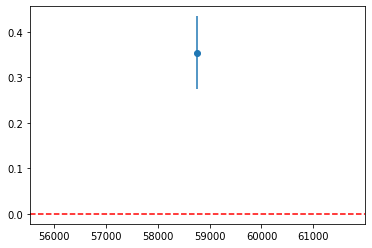

In [37]:
band = 'i'
grond_mjd = grond_lc['mjd']
grond_mags = grond_lc['mag_%s' % band]
grond_magerrs = grond_lc['magerr_%s' % band]

# interpolate the interpolated LC further..
p48_times = lc.index
p48_mags = lc['mag_"%s"_ZTF' % band]
p48_magerrs = lc['magerr_"%s"_ZTF' % band]

p48_interp_mags = np.interp(grond_mjd, p48_times, p48_mags)
p48_interp_magerrs = np.interp(grond_mjd, p48_times, p48_magerrs)

idx = np.logical_and(grond_magerrs < 0.5, p48_interp_magerrs < 0.5)
yerr = grond_magerrs + p48_interp_magerrs
plt.errorbar(grond_mjd[idx], (grond_mags-p48_interp_mags)[idx], yerr=yerr[idx], fmt='o')
plt.axhline(y=0, color='red', ls='--')